# Chessboard

On this notebook tutorial we present a example to create phenomenal.Chessboard Object.

## 1. Prerequisites

### 1.1 Download data Set 


Download the chessboard image dataset [here](https://gforge.inria.fr/frs/download.php/file/35019/CHESSBOARD_PhenoArch_2013_sv_face1.zip) and extract it.

Indicate the path in **data_path_directory** variable below. 

In [1]:
data_path_directory = './CHESSBOARD_PhenoArch_2013_sv_face1/'

### 1.2 Load path file

In [2]:
import glob

# Load path files from directory
files_path = glob.glob(data_path_directory + '*.png')

# Extract angles from path files
angles = map(lambda x: int((x.split('_sv')[-1]).split('.png')[0]), files_path)

images_path = dict()
for i in range(len(files_path)):
    images_path[angles[i]] = files_path[i]

### 1.3 Display a image

<IPython.core.display.Javascript object>


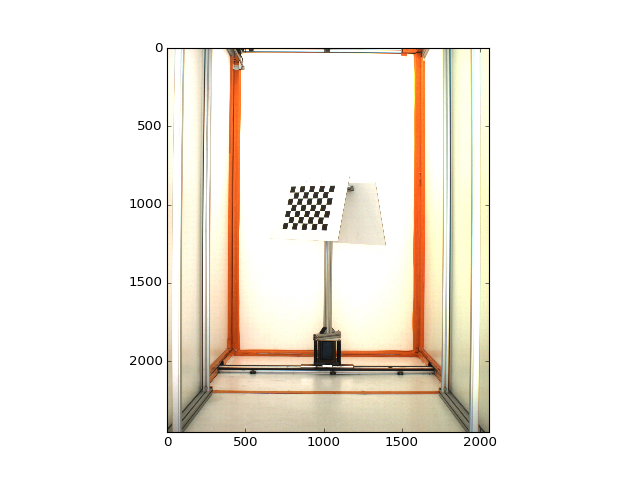

In [3]:
%matplotlib notebook

import matplotlib.pyplot
from cv2 import imread, cvtColor, IMREAD_COLOR, COLOR_RGB2BGR


def show_image(image):
    image = cvtColor(image, COLOR_RGB2BGR)
    matplotlib.pyplot.imshow(image)

angle = 90
image = imread(images_path[angle], IMREAD_COLOR)
show_image(image)

## 2. Chessboard object

### 2.1 Create

Create chessboard object with square size and shape of chessboard

In [4]:
from alinea.phenomenal.calibration.chessboard import Chessboard

square_size_of_chessboard = 47 # In mm
square_shape_of_chessboard = (8, 6) # (8 square x 6 square on chessboard)

# BUILD CHESSBOARD OBJECT
chessboard = Chessboard(square_size_of_chessboard, 
                        square_shape_of_chessboard)

# DISPLAY IT
print chessboard

Chessboard Attributes :
Square size (mm): 47
Shape : (8, 6)
Number of angle : 0



### 2.2 Find corners

In [10]:
from cv2 import imread, IMREAD_GRAYSCALE, imwrite

imwrite?

side camera,  000 angle 	- corners detected


<IPython.core.display.Javascript object>


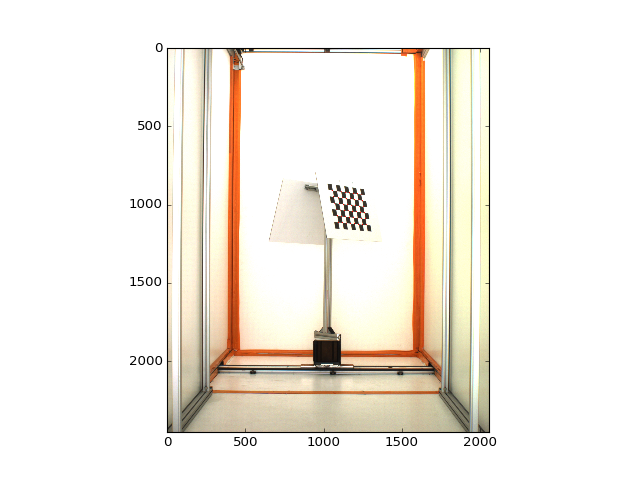

Chessboard Attributes :
Square size (mm): 47
Shape : (8, 6)
Number of angle : 1
side, 



In [24]:
from cv2 import imread, IMREAD_GRAYSCALE, imwrite

id_camera = "side"

# LOAD IMAGE AND FIND CHESSBOARD CORNERS IN EACH IMAGE
for angle in images_path:
    # LOAD IMAGE WITH OPENCV
    img = imread(images_path[angle], IMREAD_GRAYSCALE)
    # CALL CHESSBOARD FUNCTION FOR FIND CORNERS
    chessboard.find_and_add_corners(id_camera, angle, img, verbose=True)
    
    img = imread(images_path[angle], IMREAD_COLOR)
    # DRAW RED POINT ON IMAGE CORNERS POSITION
    points_2d = chessboard.image_points[id_camera][angle].astype(int)
    img[points_2d[:, 0, 1], points_2d[:, 0, 0]] = [0, 0, 255]
    
    k = 3
    
    for x, y in zip(points_2d[:, 0, 1], points_2d[:, 0, 0]):
        img[x-k:x+k, y-k:y+k] = [0, 0, 255]
     
    # DISPLAY IT
    show_image(img)
    
    imwrite("chess_0_color_points.png", img)
    
    break
    
# DISPLAY IT
print chessboard

### 2.3 Dump & load

In [13]:
chessboard.dump('chessboard')
chessboard = Chessboard.load('chessboard')

print chessboard

Chessboard Attributes :
Square size (mm): 47.0
Shape : [8, 6]
Number of angle : 1
side, 



### 2.4 Display it

<IPython.core.display.Javascript object>


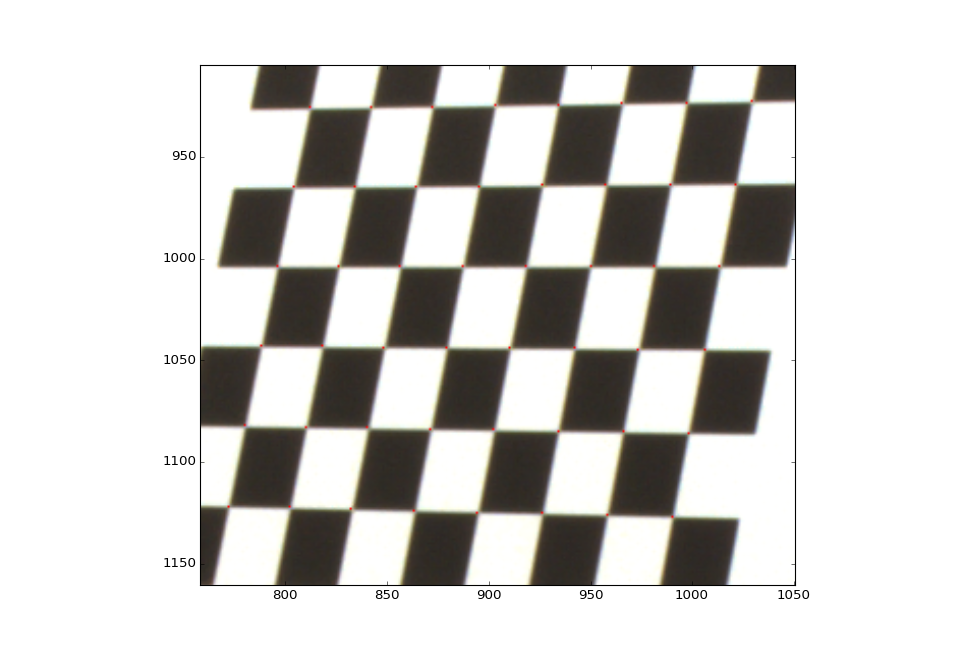

In [15]:
%matplotlib notebook

from cv2 import imread, IMREAD_COLOR

# LOAD IMAGE RGB
angle = 90
img = imread(images_path[angle], IMREAD_COLOR)

id_camera = "side" 
    
# DRAW RED POINT ON IMAGE CORNERS POSITION
points_2d = chessboard.image_points[id_camera][angle].astype(int)
img[points_2d[:, 0, 1], points_2d[:, 0, 0]] = [0, 0, 255]
# DISPLAY IT
show_image(img)